### Import Libraries

In [2]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout,Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
 

ModuleNotFoundError: No module named 'tensorflow.compat'

In [2]:
#Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
# preprocess all test images
train_generator = train_data_gen.flow_from_directory("train/",
                                                    target_size=(48,48),
                                                    batch_size=64,
                                                    color_mode='grayscale',
                                                    class_mode='categorical',
                                                    shuffle=True)
# preprocess all train images
validation_generator = validation_data_gen.flow_from_directory("test/",
                                                    target_size=(48,48),
                                                    batch_size=64,
                                                    color_mode='grayscale',
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])


C:\Users\mohit\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

C:\Users\mohit\AppData\Local\Temp\ipykernel_10000\1443782809.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/15
448/448 [==============================] - 346s 770ms/step - loss: 1.8044 - accuracy: 0.2587 - val_loss: 1.7271 - val_accuracy: 0.3442
Epoch 2/15
448/448 [==============================] - 189s 421ms/step - loss: 1.6316 - accuracy: 0.3662 - val_loss: 1.5562 - val_accuracy: 0.4180
Epoch 3/15
448/448 [==============================] - 200s 446ms/step - loss: 1.5315 - accuracy: 0.4119 - val_loss: 1.4543 - val_accuracy: 0.4515
Epoch 4/15
448/448 [==============================] - 192s 429ms/step - loss: 1.4538 - accuracy: 0.4431 - val_loss: 1.3855 - val_accuracy: 0.4757
Epoch 5/15
448/448 [==============================] - 195s 435ms/step - loss: 1.3932 - accuracy: 0.4698 - val_loss: 1.3707 - val_accuracy: 0.4781
Epoch 6/15
448/448 [==============================] - 193s 431ms/step - loss: 1.3405 - accuracy: 0.4909 - val_loss: 1.2964 - val_accuracy: 0.5134
Epoch 7/15
448/448 [==============================] - 200s 447ms/step - loss: 1.2966 - accuracy: 0.5088 - val_loss: 1.2681 -

In [6]:
emotion_model.evaluate(validation_generator)

113/113 [==============================] - 7s 64ms/step - loss: 1.1178 - accuracy: 0.5825


[1.117788314819336, 0.5824742317199707]

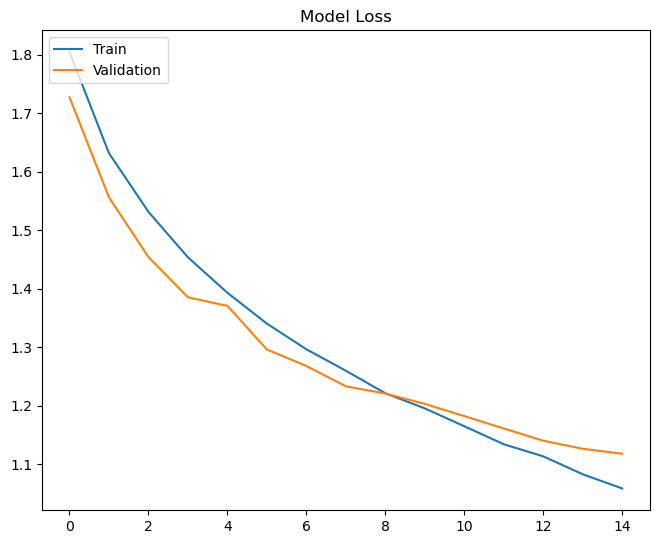

In [9]:
import matplotlib.pyplot as plt
plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

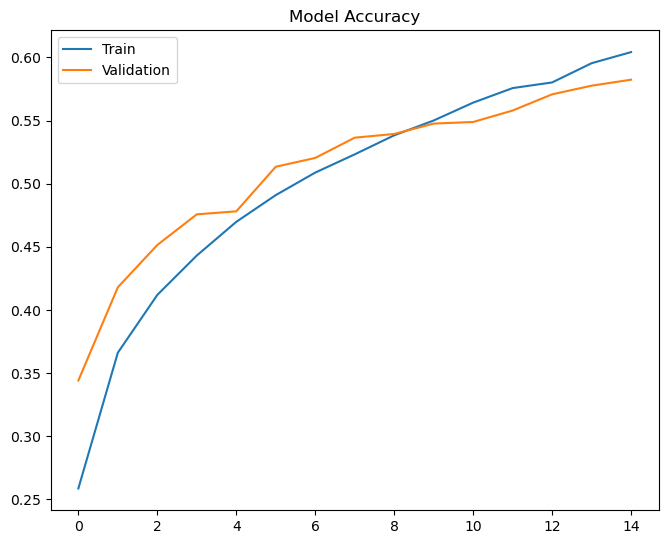

In [10]:
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [11]:
# save model structure in jason file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')